In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *

In [2]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))

In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11,
                                                             33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 129,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
#len(PSO.Target_input.index)

In [4]:
%%time

iterations_PSO(PSO)

#フローチャートをループで回して計算結果を取得
#df, total_check, variables, total_cost ,success_loops, failed_loops = loop_flowchart(PSO)

Inform the number of iterations: 3
Inform the number of particles: 2
Inform w: 0.9
Inform c1: 2
Inform c2: 2
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 3 n_particles: 2 w: 0.9 c1: 2.0 c2: 2.0 particle: {'particle_position_vector': array([[1.06220953e+03, 2.60166298e+00, 5.58092740e+00, 5.65387332e+00],
       [2.67649135e+03, 1.92043408e+01, 1.42806844e+01, 5.50332310e+00]]), 'pbest_position': array([[1.06220953e+03, 2.60166298e+00, 5.58092740e+00, 5.65387332e+00],
       [2.67649135e+03, 1.92043408e+01, 1.42806844e+01, 5.50332310e+00]]), 'pbest_fitness_value': array([inf, inf]), 'gbest_fitness_value': inf, 'gbest_position': array([[1.06220953e+03, 2.60166298e+00, 5.58092740e+00, 5.65387332e+00],
       [2.67649135e+03, 1.92043408e+01, 1.42806844e+01, 5.50332310e+00]]), 'velocity_vector': [array([0, 0, 0, 0]), array([0, 0, 0, 0])], 'previous_velocity_vector': [array([0, 0, 0, 0]), array([0, 0, 0, 0])], 'iteration': 0, 'range_vector': [3000,

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,49.150951,5.615274,0.000000,0.097000,0.097000,0.0,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,48.916500,5.588489,0.000000,0.123785,0.208452,0.0,7h: discharging 0.124[kWh].,7,0.024369,-0.123785,0.000000,0.060298
0,True,0.0,51.303236,5.861163,0.148889,0.000000,0.295700,0.0,8h: Battery charge without diesel.,8,0.320419,0.148889,0.000000,0.124170
0,True,0.0,55.133606,6.298765,0.586491,0.000000,0.255900,0.0,9h: Battery charge without diesel.,9,0.842391,0.586491,0.000000,0.000000


In [6]:
'''
plt.figure(figsize=(18,25))
#subplot(3,3,1)
plt.subplot(5,1,1)
plt.bar(df["hour"],df["pv"],label="pv output")
plt.bar(df["hour"],df["wind"],bottom=df["pv"],label="wind output")
plt.bar(df["hour"],df["diesel power"],bottom=df["pv"]+df["wind"],label="diesel power")
plt.bar(df["hour"],df["battery_discharging_power"],bottom=df["pv"]+df["wind"]+df["diesel power"],label="battery_discharge")
plt.plot(df["hour"],df["battery_charging_power"],label="battery_charge" ,lw=2, color="red")
plt.plot(df["hour"],df["demand"],label="demand", lw=3, color="gray")
plt.xlabel("hour[H]")
plt.ylabel("output[kWh]")
plt.title("output")
#plt.xticks(df["hour"], rotation='vertical')
plt.legend(loc="upper left")

#subplot(3,3,1)
plt.subplot(5,1,2)
plt.bar(df["hour"],df["trashed power"],label="trashed power",color="black")
plt.xlabel("hour[H]")
plt.ylabel("trashed output[kWh]")
plt.title("trashed output")
plt.legend(loc="upper left")

#subplot(3,3,2)
plt.subplot(5,1,3)
plt.bar(df["hour"],df["battery state[%]"],label="battery state[%]")
plt.xlabel("hour[H]")
plt.ylabel("battery state[%]")
plt.title("battery state[%]")
plt.legend(loc="upper right")

#subplot(3,3,3)
plt.subplot(5,1,4)
plt.bar(df["hour"],PSO.np_PV_efficient,label="pv output per unit",color="orange")
plt.legend(loc="upper left")
plt.xlabel("hour[H]")
plt.title("pv output per unit")
plt.ylabel("pv output per unit[kWh]")
plt.show

#subplot(3,3,3)
plt.subplot(5,1,5)
plt.bar(df["hour"],PSO.np_Wind_efficient,label="wind output per unit",color="green")
plt.legend(loc="upper left")
plt.xlabel("hour[H]")
plt.title("wind output per unit")
plt.ylabel("wind output per unit[kWh]")
plt.show
'''

'\nplt.figure(figsize=(18,25))\n#subplot(3,3,1)\nplt.subplot(5,1,1)\nplt.bar(df["hour"],df["pv"],label="pv output")\nplt.bar(df["hour"],df["wind"],bottom=df["pv"],label="wind output")\nplt.bar(df["hour"],df["diesel power"],bottom=df["pv"]+df["wind"],label="diesel power")\nplt.bar(df["hour"],df["battery_discharging_power"],bottom=df["pv"]+df["wind"]+df["diesel power"],label="battery_discharge")\nplt.plot(df["hour"],df["battery_charging_power"],label="battery_charge" ,lw=2, color="red")\nplt.plot(df["hour"],df["demand"],label="demand", lw=3, color="gray")\nplt.xlabel("hour[H]")\nplt.ylabel("output[kWh]")\nplt.title("output")\n#plt.xticks(df["hour"], rotation=\'vertical\')\nplt.legend(loc="upper left")\n\n#subplot(3,3,1)\nplt.subplot(5,1,2)\nplt.bar(df["hour"],df["trashed power"],label="trashed power",color="black")\nplt.xlabel("hour[H]")\nplt.ylabel("trashed output[kWh]")\nplt.title("trashed output")\nplt.legend(loc="upper left")\n\n#subplot(3,3,2)\nplt.subplot(5,1,3)\nplt.bar(df["hour"]

In [7]:
best_cost_list=np.array(PSO.best_cost_list)
gbest_list=np.array(PSO.gbest_list)
iteration_list=np.array(PSO.iteration_list)
plot_list = pd.DataFrame({ 'iteration' : np.array(PSO.iteration_list),
                           'cost' :np.array(PSO.best_cost_list)})
print(max(best_cost_list), min(best_cost_list))
#plot_list


51.11997669291507 51.11997669291507


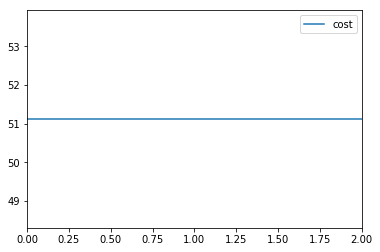

In [8]:
plot_list.plot(y="cost")

In [9]:

PSO.h
print(PSO.variables)
print(PSO.initial_cost_parameters)
print(type((df["pv"].values).tolist()) )
sum( (df["pv"]+df["wind"]+df["diesel power"]+df["battery_discharging_power"]).values).tolist()


{'pv_cap_max': 2676.491354253916, 'wind_cap_max': 19.204340838982436, 'battery_cap_max': 14.280684364363525, 'battery_max': 11.42454749149082, 'battery_min': 2.856136872872705, 'diesel_max': 5.5033230988620865, 'demand_sum': 5230.855261158001, 'pv_power_sum': 3163.6049234905126, 'wind_power_sum': 16596.228729279297, 'battery_charging_power_sum': 15258.915301747144, 'battery_discharging_power_sum': 2404.1036748007978, 'diesel_power_sum': 634.4175331766854, 'trashed_power_sum': 2308.584297842148, 'Disel_Cf_sum': 28437.962601825875}
{'It_PV_1kW[yen/year]': [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Mt_PV_1kW[yen/year]': [4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329], 'Ft_PV_1kW[yen/year]': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'It_Wind_1kW[yen/year]': [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Mt_Wind_1kW[yen/year]': [662.785213, 662

22798.35486074742

In [10]:
PSO.best['SCL']

array([8536243.04967605,  793368.3061013 ,  608823.47992588,
        793803.8767989 ,  987164.57564006,  608831.31818573,
        793804.11632495,  793804.11632796,  802191.78458012,
        793804.11632804,  793804.11632804,  608831.31828664,
        987164.58262152,  793804.11632804,  608831.31828664,
        793804.11632804,  987164.58262152,  608831.31828664,
        793804.11632804,  793804.11632804])

In [11]:
PSO.best['SEL']

array([22276.25513111, 22785.83822598, 22798.06134475, 22798.34798138,
       22798.35469951, 22798.35485697, 22798.35486066, 22798.35486075,
       22798.35486075, 22798.35486075, 22798.35486075, 22798.35486075,
       22798.35486075, 22798.35486075, 22798.35486075, 22798.35486075,
       22798.35486075, 22798.35486075, 22798.35486075, 22798.35486075])

In [12]:
PSO.variables["Disel_Cf_sum"] 

28437.962601825875

In [13]:
sum(df['Diesel_Cf'])

28437.962601825882

In [14]:
dir(PSO)

['Diesel_Cf',
 'Diesel_fc',
 'SCL',
 'SEL',
 'SOC_max',
 'SOC_min',
 'Target_input',
 'Target_input_len',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'battery_cap_max',
 'battery_charging_power',
 'battery_discharging_power',
 'battery_max',
 'battery_min',
 'best',
 'best_cost_list',
 'check',
 'df',
 'diesel_max',
 'fitness_variable_parameters',
 'flowchart_parameters',
 'flowchart_root',
 'gbest_list',
 'h',
 'initial_cost_parameters',
 'initial_input_values',
 'iteration_list',
 'np_PV_efficient',
 'np_Wind_efficient',
 'np_demand',
 'number_demand',
 'p_battery',
 'p_diesel',
 'parameters',
 'particle',
 'pv',
 'pv_cap_max',
 'pv_capacity_per_unit',
 'set_batt

In [15]:
## PSO.particle